# Preprocessing of rapideye: Cloud masking with anomaly detection method

# Example of one rapideye scene in LUSTRE:

`/LUSTRE/MADMEX/eodata/rapideye/1450115/2011/2011-01-03/l3a/`

Metadata in 2011-01-03T180703_RE5_3A-NAC_10114921_140489_metadata.xml

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2011/2011-01-03/l3a/

```
total 326M
239M Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489.tif
 86M Mar  3  2015 2011-01-03T180703_RE5_3A-NAC_10114921_140489.tif.ovr
734K Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489_browse.tif
 15K Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489_license.txt
8.4K Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489_metadata.xml
 586 Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489_readme.txt
 13K Mar 11  2014 2011-01-03T180703_RE5_3A-NAC_10114921_140489_udm.tif
```

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2012/2012-04-02/l3a/

```
total 322M
239M Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171.tif
 83M Mar  3  2015 2012-04-02T181815_RE2_3A-NAC_10853965_147171.tif.ovr
734K Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171_browse.tif
 15K Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171_license.txt
8.4K Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171_metadata.xml
 586 Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171_readme.txt
 13K Mar 12  2014 2012-04-02T181815_RE2_3A-NAC_10853965_147171_udm.tif
```

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2013/2013-02-18/l3a/

```
total 322M
239M Jul  8  2014 1450115_2013-02-18_RE5_3A_184276.tif
 83M Mar  3  2015 1450115_2013-02-18_RE5_3A_184276.tif.ovr
734K Jul  8  2014 1450115_2013-02-18_RE5_3A_184276_browse.tif
 15K Jul  8  2014 1450115_2013-02-18_RE5_3A_184276_license.txt
8.1K Jul  8  2014 1450115_2013-02-18_RE5_3A_184276_metadata.xml
 532 Jul  8  2014 1450115_2013-02-18_RE5_3A_184276_readme.txt
 13K Jul  8  2014 1450115_2013-02-18_RE5_3A_184276_udm.tif
```

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-02-12/l3a/

```
total 322M
239M Sep 30  2014 1450115_2014-02-12_RE2_3A_215717.tif
 83M Mar  3  2015 1450115_2014-02-12_RE2_3A_215717.tif.ovr
734K Sep 30  2014 1450115_2014-02-12_RE2_3A_215717_browse.tif
 15K Sep 30  2014 1450115_2014-02-12_RE2_3A_215717_license.txt
8.1K Sep 30  2014 1450115_2014-02-12_RE2_3A_215717_metadata.xml
 532 Sep 30  2014 1450115_2014-02-12_RE2_3A_215717_readme.txt
 13K Sep 30  2014 1450115_2014-02-12_RE2_3A_215717_udm.tif
```

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2015/2015-03-30/l3a/

```
total 240M
239M Aug 11  2015 1450115_2015-03-30_RE4_3A_302419.tif
734K Aug 11  2015 1450115_2015-03-30_RE4_3A_302419_browse.tif
 15K Aug 11  2015 1450115_2015-03-30_RE4_3A_302419_license.txt
8.1K Aug 11  2015 1450115_2015-03-30_RE4_3A_302419_metadata.xml
 532 Aug 11  2015 1450115_2015-03-30_RE4_3A_302419_readme.txt
 13K Aug 11  2015 1450115_2015-03-30_RE4_3A_302419_udm.tif
```

ls -lh /LUSTRE/MADMEX/eodata/rapideye/1450115/2016/2016-03-07/l3a/

```
total 240M
239M Apr  8  2016 1450115_2016-03-07_RE4_3A_359857.tif
734K Apr  8  2016 1450115_2016-03-07_RE4_3A_359857_browse.tif
 16K Apr  8  2016 1450115_2016-03-07_RE4_3A_359857_license.txt
8.1K Apr  8  2016 1450115_2016-03-07_RE4_3A_359857_metadata.xml
 532 Apr  8  2016 1450115_2016-03-07_RE4_3A_359857_readme.txt
 13K Apr  8  2016 1450115_2016-03-07_RE4_3A_359857_udm.tif
```


We need some info from metadata

In [5]:
import os
import re
import datetime
from glob import glob
import xml.etree.ElementTree as ET


In [6]:
path = '/LUSTRE/MADMEX/eodata/rapideye/1450115/2011/2011-01-03/l3a/'
#path = '/LUSTRE/MADMEX/eodata/rapideye/1450115/2012/2012-04-02/l3a/'
path = '/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/'

In [7]:
xml_file_list = glob(os.path.join(path, '*.xml'))

In [8]:
xml_file_list

['/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526_metadata.xml']

In [9]:
pattern = re.compile(r'.*[0-9]{4}-[0-9]{2}-[0-9]{2}.*_RE(2|4|5)_3A.*_metadata\.xml')

In [10]:
xml_file_list = [x for x in xml_file_list if pattern.search(x)]

In [11]:
xml_file_list

['/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526_metadata.xml']

In [12]:
if len(xml_file_list) != 1:
    raise ValueError('Could not identify a unique xml metadata file')
xml_file = xml_file_list[0]
# Start parsing xml

In [13]:
root = ET.parse(xml_file).getroot()

In [14]:
ns = 'http://www.opengis.net/gml'
ns2 = 'http://schemas.rapideye.de/products/productMetadataGeocorrected'
ns3 = 'http://earth.esa.int/eop'
ns4 = 'http://earth.esa.int/opt'

In [15]:
solar_zenith = float(root.find('ns:using/ns3:EarthObservationEquipment/ns3:acquisitionParameters/ns2:Acquisition/ns4:illuminationElevationAngle',
                               namespaces={'ns': ns, 'ns2': ns2, 'ns3':ns3, 'ns4':ns4}).text)

In [16]:
solar_zenith

83.93335

In [17]:
solar_azimuth = float(root.find('ns:using/ns3:EarthObservationEquipment/ns3:acquisitionParameters/ns2:Acquisition/ns4:illuminationAzimuthAngle',
                         namespaces={'ns': ns, 'ns2': ns2, 'ns3':ns3, 'ns4':ns4}).text)

In [18]:
rows = int(root.find('ns:resultOf/ns2:EarthObservationResult/ns3:product/ns2:ProductInformation/ns2:numRows',
                       namespaces={'ns':ns, 'ns2':ns2, 'ns3':ns3}).text)

In [19]:
rows

5000

In [20]:
columns = int(root.find('ns:resultOf/ns2:EarthObservationResult/ns3:product/ns2:ProductInformation/ns2:numColumns',
                          namespaces={'ns':ns, 'ns2':ns2, 'ns3':ns3}).text)

In [21]:
columns

5000

In [22]:
bands = int(root.find('ns:resultOf/ns2:EarthObservationResult/ns3:product/ns2:ProductInformation/ns2:numBands',
                      namespaces={'ns':ns, 'ns2':ns2, 'ns3':ns3}).text)

In [23]:
bands

5

In [24]:
import rasterio

In [25]:
tif_file_list = glob(os.path.join(path, '*.tif'))

In [26]:
tif_file_list

['/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526.tif',
 '/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526_udm.tif',
 '/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526_browse.tif']

In [27]:
pattern = re.compile(r'.*[0-9]{4}-[0-9]{2}-[0-9]{2}.*_RE(2|4|5)_3A.*[0-9]{6}\.tif$')

In [28]:
tif_file_list = [x for x in tif_file_list if pattern.search(x)]

In [29]:
tif_file_list

['/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526.tif']

In [30]:
if len(tif_file_list) != 1:
    raise ValueError('Could not identify a unique tif file')
tif_file = tif_file_list[0]

## Preprocess to TOA ... tif_file

In [31]:
tif_file

'/LUSTRE/MADMEX/eodata/rapideye/1450115/2014/2014-06-11/l3a/1450115_2014-06-11_RE2_3A_243526.tif'

In [32]:
toa_file = '/home/madmex_user/results/1450115_2014-06-11_RE2_3A_243526_toa.tif'

In [33]:
toa_file

'/home/madmex_user/results/1450115_2014-06-11_RE2_3A_243526_toa.tif'

In [34]:
with rasterio.open(toa_file) as src:
    data = src.read()
    meta_src = src.meta.copy()

In [35]:
resolution = list(meta_src['transform'])[0]
#or this?
#resolution = root.find('ns:using/ns3:EarthObservationEquipment/ns3:sensor/ns2:Sensor/ns3:resolution', 
#                        namespaces= {'ns':ns, 'ns2':ns2, 'ns3':ns3,'ns4':ns4}).text
#6.5 ???

In [36]:
resolution

5.0

# Beginning anomaly detection method

In [118]:
import numpy as np
from scipy import stats
from scipy import signal
from scipy import ndimage
from skimage import color
import matplotlib.pylab as pylab

Auxiliar functions and constants

In [93]:
FMASK_LAND = 0
FMASK_WATER = 1
FMASK_SNOW = 3
FMASK_OUTSIDE = 255
FMASK_CLOUD_SHADOW = 2
FMASK_CLOUD = 4
MORPHING_SIZE = 10
MORPHING_SIZES = [250, 150, 50]  # pixel sizes of structure elements
MAX_ERROR = 10

In [39]:
def calculate_quantiles(band, NA=0):
    quant = list()
    na_free_data = band[band > NA]
    if len(na_free_data) > 100:
        for i in range(0, 100, 1):
            p = np.percentile(na_free_data, i)
            quant.append(p)
    else:
        quant = []
    return np.array(quant)

In [40]:
def calculate_breaking_points(quant_list):
    MAX_ERROR = 5
    RANGE = 5
    CENTER = 50
    BRAKE_POINTS = dict()
    # right to left window
    for x_iter in range(100, CENTER, -1):
        x_proj = range(x_iter - RANGE, x_iter)
        # pylab.plot(x_proj, quant[x-RANGE:x], 'k',alpha=0.5)
        y_subset = quant_list[x_iter - RANGE:x_iter]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_proj, y_subset) 
        g, l = calculate_error(slope, intercept, x_proj, y_subset)
        # print x-RANGE,x, slope, intercept, y[0], f(x, slope, intercept), l,r
        if l > MAX_ERROR:
            BRAKE_POINTS[x_iter - RANGE / 2] = {"error":l, "slope":slope, "offset":intercept}
    # left to right window
    for x_iter in range(0, CENTER, 1):
        x_proj = range(x_iter, x_iter + RANGE)
        # pylab.plot(x_proj, quant_list[x_iter:x_iter + RANGE], 'k', alpha=0.3)
        y_subset = quant_list[x_iter:x_iter + RANGE]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_proj, y_subset) 
        g, l = calculate_error(slope, intercept, x_proj, y_subset)
        # print x,x+RANGE, slope, intercept, y[0], f(x, slope, intercept), l,r
        if l > MAX_ERROR:
            if ((x_iter - RANGE + x_iter) / 2) not in BRAKE_POINTS.keys():
                BRAKE_POINTS[x_iter + (RANGE / 2)] = {"error":l, "slope":slope, "offset":intercept}
        # pylab.plot([x_iter, x_iter + RANGE, ], [ f(x_iter, slope, intercept), f(x_iter + RANGE, slope, intercept)], "b", alpha=0.3)
    return BRAKE_POINTS

In [41]:
def f_lin(x, scale, off):
    return x * scale + off

In [42]:
def calculate_error(slope, offset, x_val, y_val):
    center = 50.0000001
    err_sum_total = 0.0
    err_sum_local = 0.0
    for i, x in enumerate(x_val):
            err_sum_local += ((f_lin(x, slope, offset) - y_val[i]) ** 2) * (center - x) ** 2
            err_sum_total += ((f_lin(x, slope, offset) - y_val[i]) ** 2) * (center - x) ** 2
    return err_sum_total, err_sum_local

In [48]:
def calculate_continuity(point_list):
    breaks = list()
    #point_list.sort()
    point_list = sorted(point_list)
    for i in range(1, len(point_list)):
        if point_list[i] - point_list[i - 1] != 1:
            breaks.append(point_list[i - 1])
            breaks.append(point_list[i])    
    return breaks

In [94]:
def extract_extremes(data, image_file, make_plot, steps=1000):
        # TODO: the two for and the last one takes too long to finish
    CENTER = 50
    xtiles = 5000 / steps
    ytiles = 5000 / steps
    counter = 0
    b = 0
    global_quant = list()
    for ycount in range(0, 5000, steps):
        for xcount in range(0, 5000, steps):
            subset = data[:, ycount:ycount + steps, xcount:xcount + steps]
            print("Extent: %dx%d" % (xcount, ycount))
            z, y, x = subset.shape
            rgb = np.zeros((y, x, z))
            for i in range(0, z):
                rgb[:, :, i] = subset[i, :, :] / np.max(data[i, :, :])
            col_space1 = color.rgb2lab(rgb[:, :, 0:3])
            quant = calculate_quantiles(col_space1[ :, :, 0])
            if len(quant) > 0:
                points = calculate_breaking_points(quant)
                break_points = np.array(calculate_continuity(points.keys()))
            else:
                break_points = []
            subset = data[b, ycount:ycount + steps, xcount:xcount + steps]
            if make_plot:
                pylab.subplot(xtiles, ytiles, counter + 1)
                fig = pylab.plot(quant, c="k", alpha=0.5)
            if len(break_points) > 1:
                if make_plot:
                    for point in points.keys():
                        pylab.plot(point, np.array(quant)[point], 'r.')
                if len(break_points[break_points < CENTER]) > 0:
                    min_bp = max(break_points[break_points < CENTER])
                if len(break_points[break_points > CENTER]) > 0:
                    max_bp = min(break_points[break_points > CENTER])
                if np.min(subset) != 0.0 or np.max(subset) != 0.0:
                    print("%d, %3.2f, %3.2f, %3.2f * %d, %3.2f, %3.2f, %3.2f" % (min_bp, quant[int(min_bp)], np.min(subset), quant[0] / np.min(subset), max_bp, quant[99] , np.max(subset), quant[99] / np.max(subset)))
                for i, value in enumerate(range(int(max_bp), 100, 1)):
                    modelled = f_lin(value, points[max_bp]["slope"], points[max_bp]["offset"])
                    diff = abs(quant[value] - modelled)
                    global_quant.append((value, quant[value], diff))
                for i, value in enumerate(range(0, int(min_bp),)):
                    modelled = f_lin(value, points[max_bp]["slope"], points[max_bp]["offset"])
                    diff = abs(quant[value] - modelled)
                    global_quant.append((value, quant[value], diff))
            counter += 1
            if make_plot:
                fig = pylab.gcf()
                fig.set_size_inches(18.5, 10.5)
                name = image_file.replace(".tif", "_local.png")
                fig.savefig(name, bbox_inches='tight', dpi=150)
    z, y, x = data.shape
    rgb = np.zeros((y, x, z))
    for i in range(0, z):
        rgb[:, :, i] = data[i, :, :] / np.max(data[i, :, :])
    col_space1 = color.rgb2lab(rgb[:, :, 0:3])
    subset_result = np.zeros((3, y, x), dtype=np.float)
    total_q = len(global_quant)
    for counter, item in enumerate(global_quant):
        print("%d: %d, %s" % (counter, total_q, str(item)))
        q, value, diff = item
        if diff > MAX_ERROR:
            if q < 50.0:
                subset_result[0, :, :] = np.where(col_space1[ :, :, 0] < value, 1 + col_space1[ :, :, 0] - diff, subset_result[0, :, :])
                subset_result[1, :, :] = np.where(col_space1[ :, :, 0] < value, subset_result[1, :, :] + diff, subset_result[1, :, :])
                subset_result[2, :, :] = np.where(col_space1[ :, :, 2] < value, subset_result[2, :, :] - 1, subset_result[2, :, :])
            else:                        
                subset_result[0, :, :] = np.where(col_space1[ :, :, 0] > value, 100. + col_space1[ :, :, 0] - diff, subset_result[0, :, :])
                subset_result[1, :, :] = np.where(col_space1[ :, :, 0] > value, subset_result[1, :, :] + diff, subset_result[1, :, :])
                subset_result[2, :, :] = np.where(col_space1[ :, :, 2] > value, subset_result[2, :, :] + 1, subset_result[2, :, :])
    return subset_result

In [102]:
def convert_cloud_to_fmask(raster):
    from numpy.core.numerictypes import byte
    z, y, x = raster.shape
    fmask = np.zeros((y, x)).astype(byte)  # FMASK_LAND
    fmask = np.where (raster[0, :, :] > 100, FMASK_CLOUD, fmask)
    fmask = np.where (raster[0, :, :] < 100, FMASK_CLOUD_SHADOW, fmask)
    fmask = np.where (raster[0, :, :] == 0, FMASK_LAND, fmask)
    fmask = np.where (raster[0, :, :] == -999.0, FMASK_OUTSIDE, fmask)
    fmask = signal.medfilt2d(fmask * 1.0, kernel_size=3)
    fmask = signal.medfilt2d(fmask * 1.0, kernel_size=5)    
    return fmask

In [96]:
make_plot=False

In [97]:
res_extract_extremes = extract_extremes(data, toa_file, make_plot, steps=1000)

Extent: 0x0
3, 10.08, 0.09, 90.77 * 89, 22.85, 0.91, 25.02
Extent: 1000x0
5, 11.14, 0.09, 92.10 * 93, 23.33, 0.92, 25.47
Extent: 2000x0
4, 11.44, 0.09, 89.43 * 84, 26.36, 0.50, 52.25
Extent: 3000x0
5, 9.63, 0.08, 69.52 * 90, 27.42, 0.28, 96.98
Extent: 4000x0
6, 9.26, 0.08, 70.29 * 88, 20.37, 0.26, 79.31
Extent: 0x1000
3, 10.11, 0.09, 78.09 * 95, 21.97, 0.27, 80.08
Extent: 1000x1000
3, 10.17, 0.09, 87.04 * 93, 23.88, 0.51, 46.91
Extent: 2000x1000
4, 10.93, 0.09, 85.20 * 87, 26.44, 0.72, 36.94
Extent: 3000x1000
3, 10.49, 0.09, 83.49 * 93, 26.22, 0.30, 87.97
Extent: 4000x1000
3, 10.72, 0.10, 94.50 * 96, 22.09, 0.49, 45.04
Extent: 0x2000
5, 10.62, 0.09, 71.17 * 93, 20.55, 0.34, 60.09
Extent: 1000x2000
4, 10.94, 0.09, 81.28 * 94, 20.67, 0.29, 71.01
Extent: 2000x2000
3, 11.44, 0.09, 80.14 * 94, 19.60, 0.28, 69.17
Extent: 3000x2000
3, 10.75, 0.09, 77.22 * 95, 20.93, 0.29, 71.96
Extent: 4000x2000
2, 9.79, 0.10, 87.29 * 94, 20.15, 0.39, 51.91
Extent: 0x3000
3, 9.06, 0.08, 78.63 * 94, 19.44, 0.3

In [98]:
res_extract_extremes

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  9.41189112e-01,  9.54300185e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -8.84614080e+00,  1.87901950e-01, -9.15998831e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.33004760e-01,  1.93343562e-01, -9.08893302e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.98719442e-01,  3.34748349e-01, -9.05172286e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  2.84990571e+01,  2.84990571e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [105]:
cloud_mask = convert_cloud_to_fmask(res_extract_extremes)

In [106]:
cloud_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 0.],
       [0., 0., 0., ..., 2., 0., 0.]])

In [107]:
clouds = np.where(cloud_mask == FMASK_CLOUD, 1, 0)
shadows = np.where(cloud_mask == FMASK_CLOUD_SHADOW, 1, 0)

In [108]:
dilation = None

In [109]:
def morph_dilation(input_image_raster, filter_size):
    '''
    Morphological dilation of raster
    '''
    ndim = 3
    if input_image_raster.ndim == 2:
        input_image_raster = np.expand_dims(input_image_raster, axis=0)
        ndim = 2
    if input_image_raster.ndim != 3:
        raise Exception("Input array has to be 3D")
    if ndim == 3:
        return ndimage.grey_dilation(input_image_raster, (1, filter_size, filter_size))
    else:
        return ndimage.grey_dilation(input_image_raster, (1, filter_size, filter_size))[0]

In [110]:
if dilation:
    clouds = morph_dilation(clouds, dilation)
    shadows = morph_dilation(shadows, dilation)

In [111]:
def calculate_cloud_shadow(clouds, shadows, solar_zenith, solar_azimuth, resolution):
    '''
    This method iterates over a list of different cloud heights, and calculates
    the shadow that the clouds in the given mask project. This projections are
    then intersected with the shadow mask that we already have.
    '''
    cloud_row_column = np.column_stack(np.where(clouds == 1))
    cloud_heights = np.arange(500, 5200, 100) #before we have in old version of antares: 1000, 3100, 100
    cloud_mask_shape = clouds.shape
    clouds_projection = np.zeros(cloud_mask_shape)  
    for cloud_height in cloud_heights:    
        distance = cloud_height / resolution * np.tan(np.deg2rad(90 - solar_zenith))
        y_difference = distance * np.sin(np.deg2rad(360 - solar_azimuth))
        x_difference = distance * np.cos(np.deg2rad(360 - solar_azimuth))     
        if solar_azimuth < 180:
            rows = cloud_row_column[:, 0] - y_difference/resolution
            cols = cloud_row_column[:, 1] - x_difference/resolution
        else:
            rows = cloud_row_column[:, 0] + y_difference/resolution
            cols = cloud_row_column[:, 1] + x_difference/resolution
        rows = rows.astype(np.int)
        cols = cols.astype(np.int)
        np.putmask(rows, rows < 0, 0)
        np.putmask(cols, cols < 0, 0)
        np.putmask(rows, rows >= cloud_mask_shape[0] - 1, cloud_mask_shape[0] - 1)
        np.putmask(cols, cols >= cloud_mask_shape[1] - 1, cloud_mask_shape[1] - 1)
        clouds_projection[rows, cols] = 1  
    in_between = shadows * clouds_projection
    return in_between

In [112]:
projected_shadows = calculate_cloud_shadow(clouds, shadows, solar_zenith, solar_azimuth, resolution) 

In [113]:
projected_shadows

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## First Approach 

the one that its implemented in old version in antares

## Second Approach 

the one that its in: https://github.com/CONABIO/madmex-v2/blob/master/adapters/workflow/mask/clouddetection_rapideye.py#L145

In [114]:
data.shape

(5, 5000, 5000)

In [115]:
final_mask = np.zeros([data.shape[2], data.shape[1]])

In [116]:
np.putmask(final_mask, data[0, :, :] == 0, FMASK_OUTSIDE)

In [119]:
# apply buffering of clouds
m = len(MORPHING_SIZES)
for MORPHING_SIZE in MORPHING_SIZES:
    np.putmask(final_mask, morph_dilation(clouds, MORPHING_SIZE) == 1, FMASK_CLOUD * 10 + m)
    m = m - 1

In [120]:
# write shadows to raster
np.putmask(final_mask, projected_shadows == 1, FMASK_CLOUD_SHADOW)
# write core clouds to raster
np.putmask(final_mask, clouds == 1, FMASK_CLOUD)

In [121]:
filename_result = os.path.splitext(os.path.basename(toa_file))[0] + '_clouds_with_anomaly_detection' + '.tif'

In [122]:
filename_path_result = os.path.expanduser(os.path.join("~/", filename_result))

In [123]:
filename_path_result

'/home/madmex_user/1450115_2014-06-11_RE2_3A_243526_toa_clouds_with_anomaly_detection.tif'

In [124]:
meta = meta_src

In [125]:
meta.update(compress='lzw',
            count = 1,
            dtype=rasterio.float64)

In [126]:
meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 5000,
 'height': 5000,
 'count': 1,
 'crs': CRS.from_epsg(32614),
 'transform': Affine(5.0, 0.0, 499500.0,
        0.0, -5.0, 2664500.0),
 'compress': 'lzw'}

In [128]:
with rasterio.open(filename_path_result, "w", **meta) as dst:
    dst.write(final_mask,1)

In [129]:
from matplotlib.pyplot import imshow

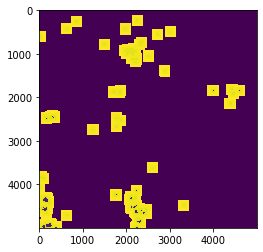

In [131]:
imshow(final_mask)